In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline
from glob import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import time

In [2]:
img = cv2.imread("data/dennoban_20181224.png")

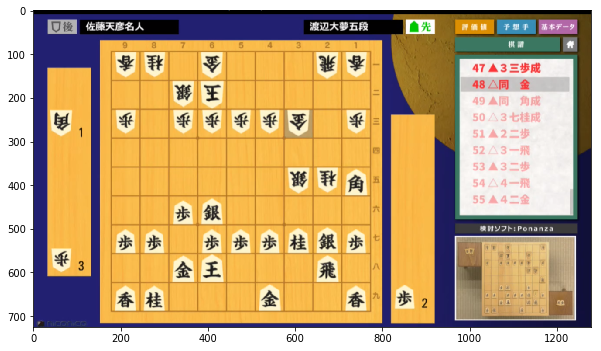

In [3]:
def display_cv2_img(img, figsize=(10,10)):
    plt.figure(figsize=figsize)
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    plt.imshow(img)

display_cv2_img(img)

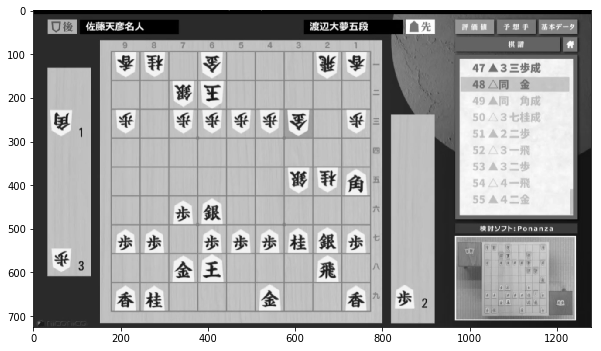

In [4]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display_cv2_img(img_gray)

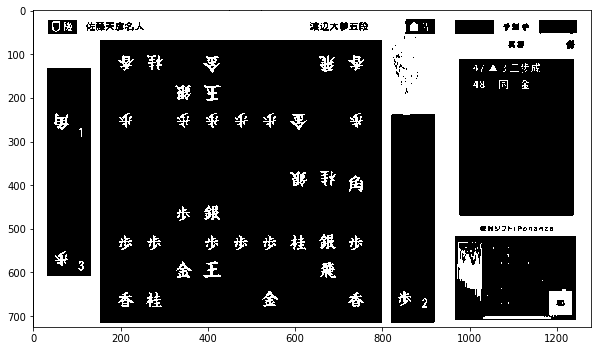

In [5]:
img_blur = img_gray#  cv2.GaussianBlur(img_gray, (11, 11), 0) #(C)
img_threshold = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
display_cv2_img(img_threshold)


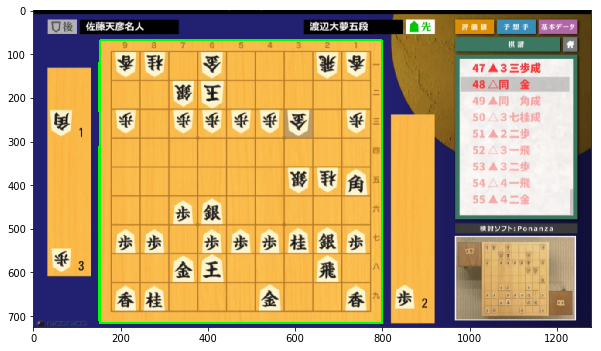

In [6]:
contours = cv2.findContours(img_threshold, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[1]

def area_of_bounding_box(points, verbose=False):
    pts = np.reshape(points, (-1, 2))
    min_pt = np.min(pts, axis=0)
    max_pt = np.max(pts, axis=0)
    delta = max_pt - min_pt
    if verbose:
        print(max_pt, min_pt)
    return delta[0] * delta[1]

sorted_conts = sorted(contours, key=lambda c: area_of_bounding_box(c))

img_cont = img.copy()
img_cont = cv2.drawContours(img_cont, sorted_conts[-2:-1], -1, (0,255,0), 3)
display_cv2_img(img_cont)


(648, 648, 3)
(152, 68, 800, 716)


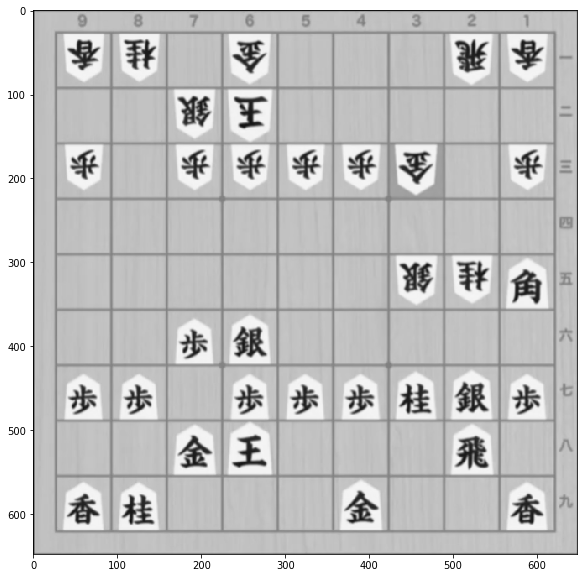

In [13]:
def get_bounding_box(points):
    pts = np.reshape(points, (-1, 2))
    min_pt = np.min(pts, axis=0)
    max_pt = np.max(pts, axis=0)
    return (min_pt[0], min_pt[1], max_pt[0], max_pt[1])
    
main_board = get_bounding_box(sorted_conts[-2])
img_board_gray = img_gray[main_board[1]:main_board[3], main_board[0]:main_board[2]]
img_board = img[main_board[1]:main_board[3], main_board[0]:main_board[2], :]

#img_board_threshold = cv2.threshold(img_board_gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]

print(img_board.shape)
print(main_board)
display_cv2_img(img_board_gray)

In [24]:
offset_x = 27
offset_y = 27
cell_h = 66
cell_w = 66

def get_cell(img, cell_x, cell_y):
    x1 = offset_x + cell_w * cell_x
    x2 = offset_x + cell_w * (1 + cell_x)
    y1 = offset_y + cell_h * cell_y
    y2 = offset_y + cell_h * (1 + cell_y)
    if len(img.shape) == 3:
        return img[y1:y2,x1:x2,:]
    return img[y1:y2,x1:x2]

cell_imgs = []
for y in range(9):
    for x in range(9):
        cell_imgs.append(get_cell(img_board, x, y))


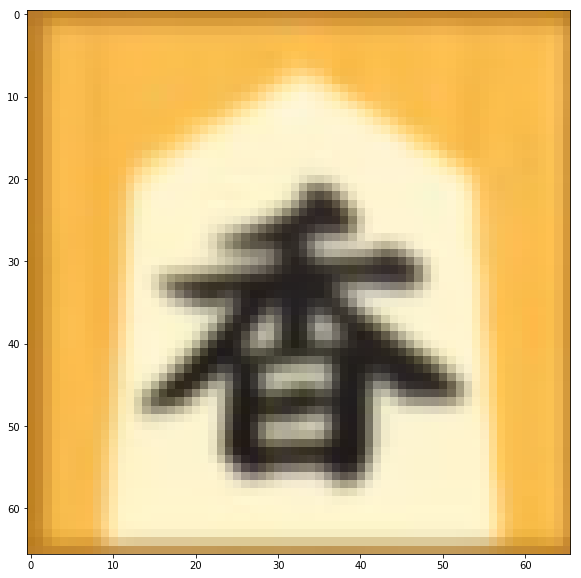

In [26]:
display_cv2_img(cell_imgs[80])

(0, 0.7937587031911432, 'data/hu.png')
(0, 0.8828774098129971, 'data/hu.png')
(8, 0.749436436884595, 'data/empty.png')
(0, 0.8778100180053953, 'data/hu.png')
(8, 0.9968794823383696, 'data/empty.png')
(8, 0.8964122038734375, 'data/empty.png')
(8, 0.8335274618078125, 'data/empty.png')
(6, 0.8718120325731796, 'data/kin.png')
(5, 0.9386717286526988, 'data/gin.png')
(8, 0.9146408984107578, 'data/empty.png')
(8, 0.8626392190616389, 'data/empty.png')
(0, 0.8882512421538065, 'data/hu.png')
(7, 0.8788679014579905, 'data/gyoku.png')
(8, 0.933543714777049, 'data/empty.png')
(8, 0.9288773655578286, 'data/empty.png')
(8, 0.8928824749835508, 'data/empty.png')
(0, 0.7986908682736352, 'data/hu.png')
(4, 0.7845226887601424, 'data/kei.png')
(0, 0.8903845130099461, 'data/hu.png')
(8, 0.9133665502171499, 'data/empty.png')
(0, 0.9462568786178377, 'data/hu.png')
(4, 0.9205754151273365, 'data/kei.png')
(0, 0.9216662303950426, 'data/hu.png')
(0, 0.9476290974888533, 'data/hu.png')
(7, 0.4765218273196211, 'data

c:\users\furaga\appdata\local\continuum\anaconda3\envs\shogi\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


(8, 0.8571052965071445, 'data/empty.png')
(8, 0.8806666283316351, 'data/empty.png')
(5, 0.7055746936391422, 'data/gin.png')
(4, 0.7893439849159435, 'data/kei.png')
(0, 0.7673145728146914, 'data/hu.png')
(0, 0.8254922315708939, 'data/hu.png')
(8, 0.9257175299176055, 'data/empty.png')
(8, 0.8981938074577883, 'data/empty.png')
(4, 0.7995501410017616, 'data/kei.png')
(8, 0.9007009644543325, 'data/empty.png')
(4, 0.8931237648984781, 'data/kei.png')
(4, 0.9416063975725704, 'data/kei.png')
(2, 0.9844039648470765, 'data/kaku.png')
(0, 0.8190544060750488, 'data/hu.png')
(0, 0.7737277860401423, 'data/hu.png')
(0, 0.9870726770209871, 'data/hu.png')
(6, 0.911652595529015, 'data/kin.png')
(4, 0.7054896539162677, 'data/kei.png')
(0, 0.7832114167437736, 'data/hu.png')
(0, 0.8030335871635781, 'data/hu.png')
(5, 0.7422870253592129, 'data/gin.png')
(5, 0.7816100648714076, 'data/gin.png')
(6, 0.9097903044590662, 'data/kin.png')
(0, 0.9275204657050795, 'data/hu.png')
(0, 0.8077918575150006, 'data/hu.png')

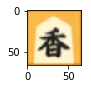

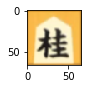

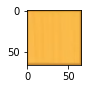

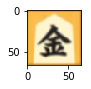

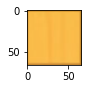

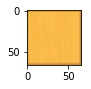

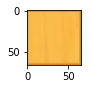

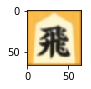

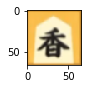

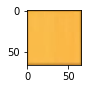

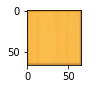

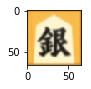

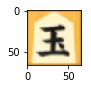

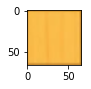

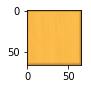

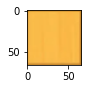

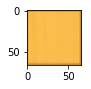

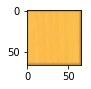

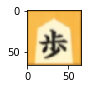

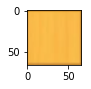

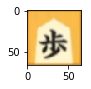

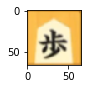

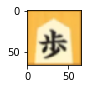

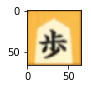

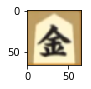

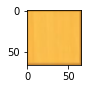

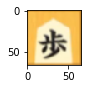

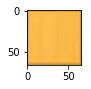

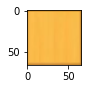

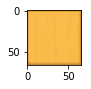

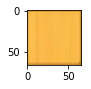

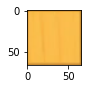

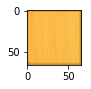

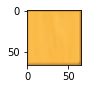

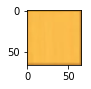

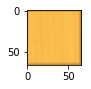

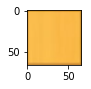

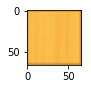

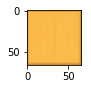

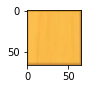

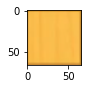

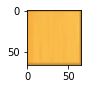

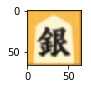

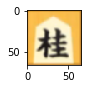

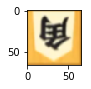

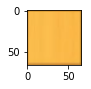

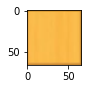

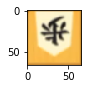

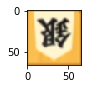

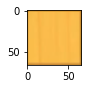

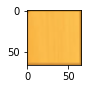

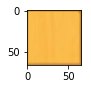

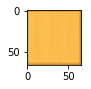

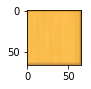

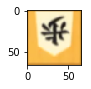

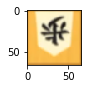

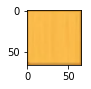

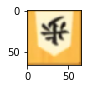

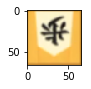

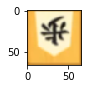

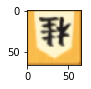

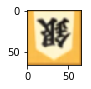

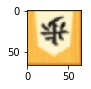

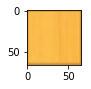

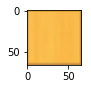

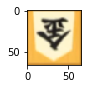

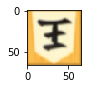

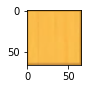

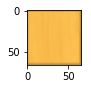

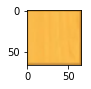

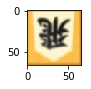

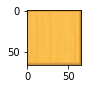

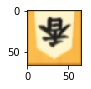

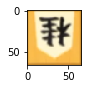

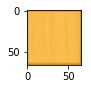

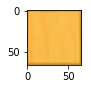

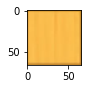

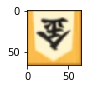

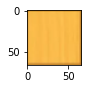

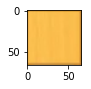

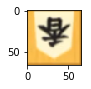

In [48]:
files = [
    "data/hu.png", 
    "data/hi.png", 
    "data/kaku.png", 
    "data/kyo.png", 
    "data/kei.png", 
    "data/gin.png", 
    "data/kin.png", 
    "data/gyoku.png",
    "data/empty.png"
]

ref_coma_hists = [cv2.calcHist([cv2.imread(path)], [0], None, [256], [0, 256]) for path in files]

def which_coma(target_img):
    target_hist = cv2.calcHist([target_img], [0], None, [256], [0, 256])
    scores = []
    for i, comparing_hist in enumerate(ref_coma_hists):
        ret = cv2.compareHist(target_hist, comparing_hist, 0)
        scores.append((i, ret, files[i]))
#        print(ret, files[i])
    sorted_scores = sorted(scores, key=lambda sc: sc[1])
    return sorted_scores[-1]

for target_img  in cell_imgs:
    display_cv2_img(target_img[::-1,::-1,:], figsize=(1,1))
    print(which_coma(target_img[::-1,::-1,:]))